In [1]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 38.4 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
model_id1="dreamlike-art/dreamlike-diffusion-1.0"
model_id2="stabilityai/stable-diffusion-xl-base-1.0"

pipe=StableDiffusionPipeline.from_pretrained(model_id1,torch_dtype=torch.float16,use_safetensors=True)
pipe=pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
prompt="dreamlike, a cute little girl sitting at the beach in the sunset"

In [5]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT] dreamlike, a cute little girl sitting at the beach in the sunset


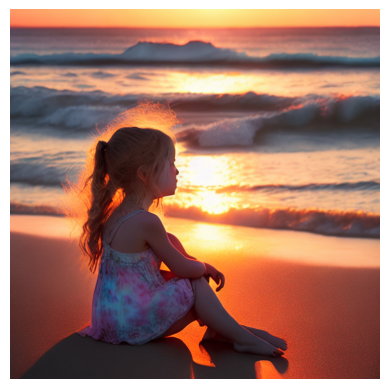

In [6]:
print("[PROMPT]",prompt)
plt.imshow(image);
plt.axis('off');

In [7]:
prompt2="dreamlike, a cute boy playing cello in the concert"

In [10]:
image=pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT] dreamlike, a cute boy playing cello in the concert


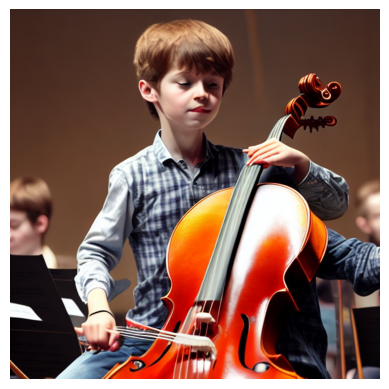

In [11]:
print("[PROMPT]",prompt2)
plt.imshow(image);
plt.axis('off');

In [12]:
#Working with Stable Diffusion Parameters
#Negative propmting
#num_inference_steps
#height
#weight
#num_images_per_prompt

In [14]:
def generate_image(pipe,prompt,params):
  img=pipe(prompt,**params).images
  num_images=len(img)
  if num_images>1:
    fig,ax=plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
     ax[i].imshow(img[i]);
     ax[i].axis('off');

  else:
    fig=plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
    plt.tight_layout()



In [15]:
prompt="dreamlike, a indian girl playing with rainbow colors "

In [16]:
params={}

  0%|          | 0/50 [00:00<?, ?it/s]

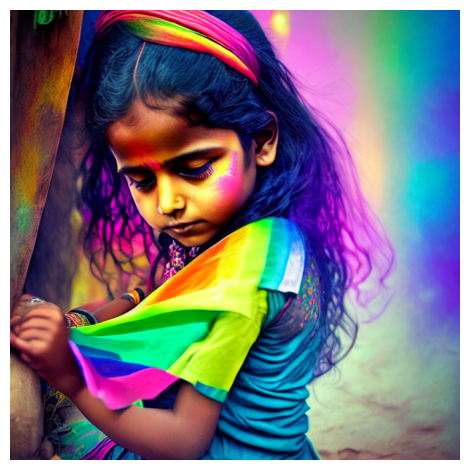

In [17]:
generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

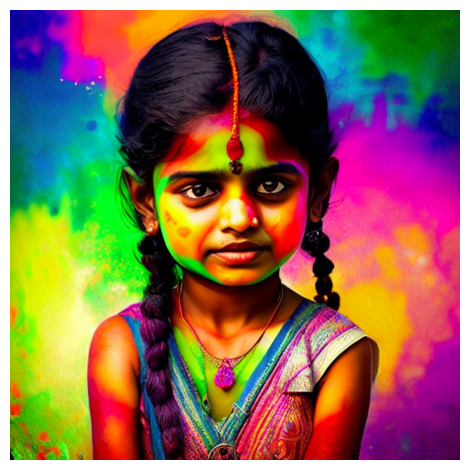

In [18]:
#num inference steps
params={'num_inference_steps':100}

generate_image(pipe,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

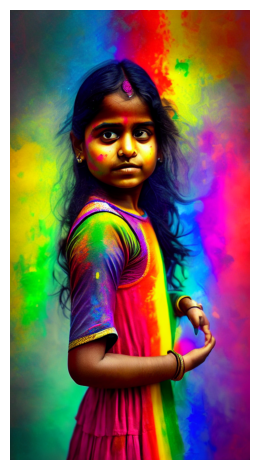

In [20]:
#Height and width
params={'num_inference_ateps':100,'width':512,'height':int(1.5*640)}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

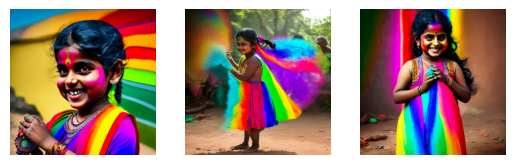

In [21]:
#num_images_per_prompt
params={'num_inference_steps':100,'num_images_per_prompt':3}
generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

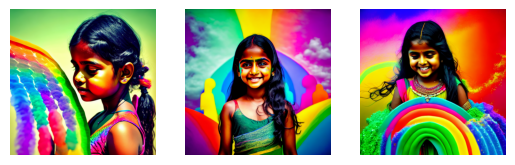

In [22]:
#negative prompt
params={'num_inference_steps':100,'num_images_per_prompt':3,'negative_prompt':'ugly,sad,low quality image of a girl'}
generate_image(pipe,prompt,params)
